# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

In [2]:
#LOADING DATASET(CANON DATASET)

In [3]:
dataset=pd.read_csv('datasetcanon.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,08-03-2021,21.730000,21.850000,21.629999,21.719999,21.719999,227500
1,09-03-2021,22.000000,22.080000,21.940001,22.020000,22.020000,254100
2,10-03-2021,21.940001,22.000000,21.770000,21.959999,21.959999,226200
3,11-03-2021,21.889999,21.940001,21.780001,21.910000,21.910000,123300
4,12-03-2021,21.590000,21.760000,21.510000,21.709999,21.709999,178300
...,...,...,...,...,...,...,...
247,28-02-2022,23.549999,23.680000,23.480000,23.629999,23.629999,247200
248,01-03-2022,23.480000,23.620001,23.170000,23.250000,23.250000,244900
249,02-03-2022,22.840000,22.990000,22.700001,22.959999,22.959999,358500
250,03-03-2022,23.020000,23.150000,22.830000,22.969999,22.969999,249100


In [4]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,23.629960,23.761190,23.477698,23.618095,23.618095,2.914446e+05
std,0.837423,0.847946,0.838204,0.844666,0.844666,2.388592e+05
min,21.590000,21.760000,21.000000,21.540001,21.540001,1.091000e+05
25%,23.000000,23.165000,22.897500,22.990000,22.990000,1.773250e+05
50%,23.714999,23.850000,23.564999,23.714999,23.714999,2.344500e+05
75%,24.200001,24.420000,24.070000,24.212499,24.212499,3.150000e+05
max,25.440001,25.940001,25.240000,25.370001,25.370001,2.253800e+06


In [5]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,08-03-2021,21.730000,21.850000,21.629999,21.719999,21.719999,227500
1,09-03-2021,22.000000,22.080000,21.940001,22.020000,22.020000,254100
2,10-03-2021,21.940001,22.000000,21.770000,21.959999,21.959999,226200
3,11-03-2021,21.889999,21.940001,21.780001,21.910000,21.910000,123300
4,12-03-2021,21.590000,21.760000,21.510000,21.709999,21.709999,178300


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,28-02-2022,23.549999,23.680000,23.480000,23.629999,23.629999,247200
248,01-03-2022,23.480000,23.620001,23.170000,23.250000,23.250000,244900
249,02-03-2022,22.840000,22.990000,22.700001,22.959999,22.959999,358500
250,03-03-2022,23.020000,23.150000,22.830000,22.969999,22.969999,249100
251,04-03-2022,22.900000,23.030001,22.780001,22.870001,22.870001,234727


In [8]:
dataset['Open'].describe()

count    252.000000
mean      23.629960
std        0.837423
min       21.590000
25%       23.000000
50%       23.714999
75%       24.200001
max       25.440001
Name: Open, dtype: float64

In [9]:
dataset['High'].describe()

count    252.000000
mean      23.761190
std        0.847946
min       21.760000
25%       23.165000
50%       23.850000
75%       24.420000
max       25.940001
Name: High, dtype: float64

In [10]:
dataset['Low'].describe()

count    252.000000
mean      23.477698
std        0.838204
min       21.000000
25%       22.897500
50%       23.564999
75%       24.070000
max       25.240000
Name: Low, dtype: float64

In [11]:
dataset['Close'].describe()

count    252.000000
mean      23.618095
std        0.844666
min       21.540001
25%       22.990000
50%       23.714999
75%       24.212499
max       25.370001
Name: Close, dtype: float64

In [12]:
dataset['Volume'].describe()

count    2.520000e+02
mean     2.914446e+05
std      2.388592e+05
min      1.091000e+05
25%      1.773250e+05
50%      2.344500e+05
75%      3.150000e+05
max      2.253800e+06
Name: Volume, dtype: float64

# DATA VISUALISATION

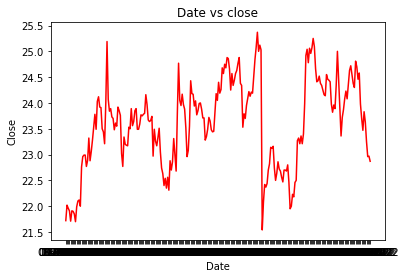

In [13]:
plt.plot(dataset['Date'],dataset['Close'],'r')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title("Date vs close")
plt.savefig('variations.jpg')
plt.show()

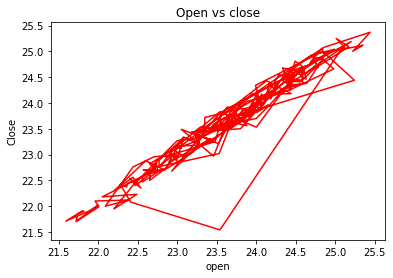

In [14]:
plt.plot(dataset['Open'],dataset['Close'],'r')
plt.xlabel('open')
plt.ylabel('Close')
plt.title("Open vs close")
plt.show()

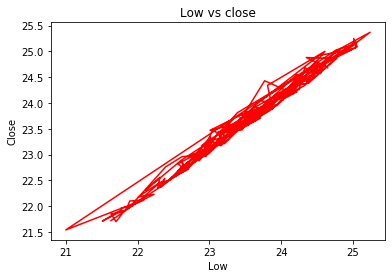

In [15]:
plt.plot(dataset['Low'],dataset['Close'],'r')
plt.xlabel('Low')
plt.ylabel('Close')
plt.title("Low vs close")
plt.show()

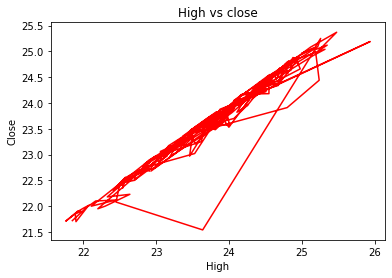

In [16]:
plt.plot(dataset['High'],dataset['Close'],'r')
plt.xlabel('High')
plt.ylabel('Close')
plt.title("High vs close")
plt.show()

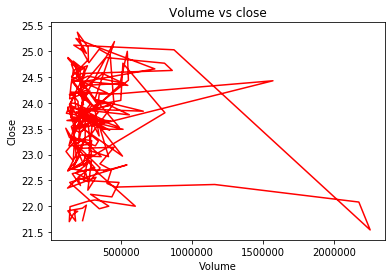

In [17]:
plt.plot(dataset['Volume'],dataset['Close'],'r')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.title("Volume vs close")
plt.show()

# CHECKING FOR OUTLIERS

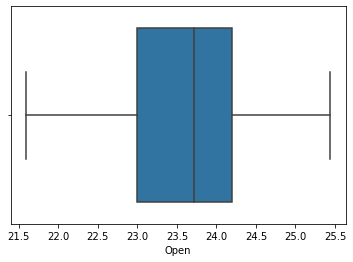

In [18]:
sns.boxplot(dataset["Open"])

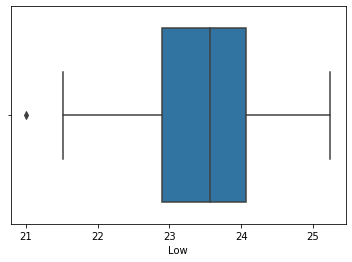

In [19]:
sns.boxplot(dataset["Low"])

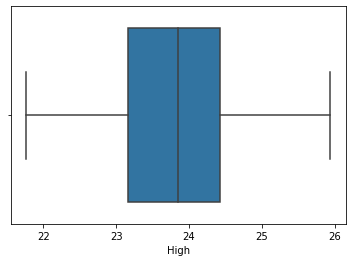

In [20]:
sns.boxplot(dataset["High"])

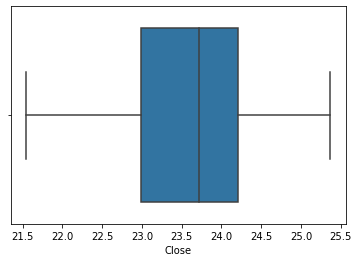

In [21]:
sns.boxplot(dataset["Close"])

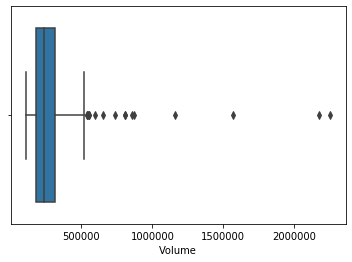

In [22]:
sns.boxplot(dataset["Volume"])

In [23]:
dataset.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.990086,0.972603,0.969263,0.969263,-0.004490
High,0.990086,1.000000,0.971934,0.978127,0.978127,0.011036
Low,0.972603,0.971934,1.000000,0.991497,0.991497,-0.128617
Close,0.969263,0.978127,0.991497,1.000000,1.000000,-0.090810
Adj Close,0.969263,0.978127,0.991497,1.000000,1.000000,-0.090810
Volume,-0.004490,0.011036,-0.128617,-0.090810,-0.090810,1.000000


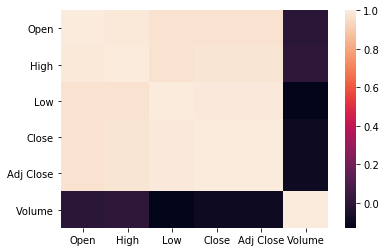

In [24]:
sns.heatmap(dataset.corr())

# DATA PREPROCESSING

In [25]:
dataset["Close"].value_counts()

23.490000    5
23.889999    4
24.340000    4
22.700001    4
23.700001    3
            ..
23.180000    1
23.940001    1
24.129999    1
24.260000    1
22.230000    1
Name: Close, Length: 171, dtype: int64

In [26]:
dataset.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [27]:
dataset=dataset.iloc[:,1:]
dataset

,Open,High,Low,Close,Adj Close,Volume
0,21.730000,21.850000,21.629999,21.719999,21.719999,227500
1,22.000000,22.080000,21.940001,22.020000,22.020000,254100
2,21.940001,22.000000,21.770000,21.959999,21.959999,226200
3,21.889999,21.940001,21.780001,21.910000,21.910000,123300
4,21.590000,21.760000,21.510000,21.709999,21.709999,178300
...,...,...,...,...,...,...
247,23.549999,23.680000,23.480000,23.629999,23.629999,247200
248,23.480000,23.620001,23.170000,23.250000,23.250000,244900
249,22.840000,22.990000,22.700001,22.959999,22.959999,358500
250,23.020000,23.150000,22.830000,22.969999,22.969999,249100


In [28]:
dataset=dataset.drop('Adj Close',axis=1)
dataset

,Open,High,Low,Close,Volume
0,21.730000,21.850000,21.629999,21.719999,227500
1,22.000000,22.080000,21.940001,22.020000,254100
2,21.940001,22.000000,21.770000,21.959999,226200
3,21.889999,21.940001,21.780001,21.910000,123300
4,21.590000,21.760000,21.510000,21.709999,178300
...,...,...,...,...,...
247,23.549999,23.680000,23.480000,23.629999,247200
248,23.480000,23.620001,23.170000,23.250000,244900
249,22.840000,22.990000,22.700001,22.959999,358500
250,23.020000,23.150000,22.830000,22.969999,249100


In [29]:
z=np.abs(stats.zscore(dataset))
z

array([[2.27333353, 2.25839051, 2.20874079, 2.25162743, 0.26824092],
       [1.95027412, 1.98660712, 1.83816424, 1.89574952, 0.15665661],
       [2.0220639 , 2.08114048, 2.04138353, 1.96692605, 0.27369429],
       ...,
       [0.94520043, 0.91129023, 0.92965986, 0.78067033, 0.28129082],
       [0.72982749, 0.72222352, 0.77425898, 0.76880778, 0.17763111],
       [0.87340945, 0.86402237, 0.83402781, 0.88743097, 0.23792439]])

In [30]:
threshold=1.5
np.where(z>threshold)
dataset1=dataset[(z<=1.5).all(axis=1)]
dataset1

,Open,High,Low,Close,Volume
13,22.440001,22.790001,22.389999,22.760000,288900
14,22.709999,22.980000,22.620001,22.959999,262000
15,22.990000,23.080000,22.900000,22.990000,301500
16,22.950001,23.080000,22.840000,22.990000,210700
17,22.770000,22.809999,22.650000,22.770000,164600
...,...,...,...,...,...
247,23.549999,23.680000,23.480000,23.629999,247200
248,23.480000,23.620001,23.170000,23.250000,244900
249,22.840000,22.990000,22.700001,22.959999,358500
250,23.020000,23.150000,22.830000,22.969999,249100


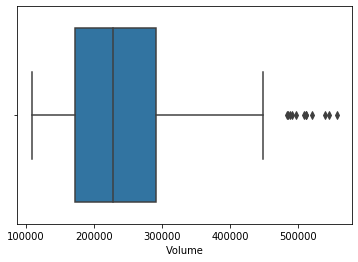

In [31]:
sns.boxplot(dataset1['Volume'])

In [32]:
Q1=dataset.quantile(0.25)
Q1

Open          23.0000
High          23.1650
Low           22.8975
Close         22.9900
Volume    177325.0000
Name: 0.25, dtype: float64

In [33]:
Q3=dataset.quantile(0.75)
Q3

Open          24.200001
High          24.420000
Low           24.070000
Close         24.212499
Volume    315000.000000
Name: 0.75, dtype: float64

In [34]:
IQR=Q3-Q1
IQR

Open           1.200001
High           1.255000
Low            1.172500
Close          1.222499
Volume    137675.000000
dtype: float64

In [35]:
dataset2=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]
dataset2

,Open,High,Low,Close,Volume
0,21.730000,21.850000,21.629999,21.719999,227500
1,22.000000,22.080000,21.940001,22.020000,254100
2,21.940001,22.000000,21.770000,21.959999,226200
3,21.889999,21.940001,21.780001,21.910000,123300
4,21.590000,21.760000,21.510000,21.709999,178300
...,...,...,...,...,...
247,23.549999,23.680000,23.480000,23.629999,247200
248,23.480000,23.620001,23.170000,23.250000,244900
249,22.840000,22.990000,22.700001,22.959999,358500
250,23.020000,23.150000,22.830000,22.969999,249100


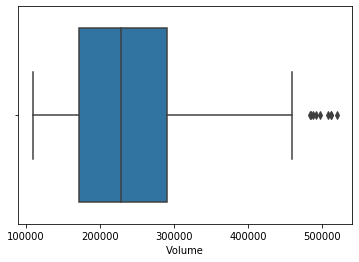

In [36]:
sns.boxplot(dataset2['Volume'])

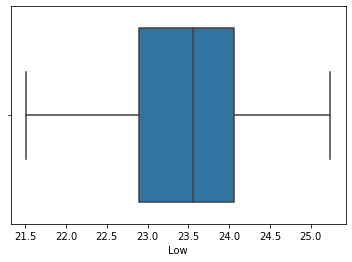

In [37]:
sns.boxplot(dataset2['Low'])

# QUANTILE METHOD REMOVED MORE OUTLIERS

In [38]:
y=dataset2.iloc[:,3]
y

0      21.719999
1      22.020000
2      21.959999
3      21.910000
4      21.709999
         ...    
247    23.629999
248    23.250000
249    22.959999
250    22.969999
251    22.870001
Name: Close, Length: 236, dtype: float64

In [39]:
x=dataset2.drop('Close',axis=1)
x

,Open,High,Low,Volume
0,21.730000,21.850000,21.629999,227500
1,22.000000,22.080000,21.940001,254100
2,21.940001,22.000000,21.770000,226200
3,21.889999,21.940001,21.780001,123300
4,21.590000,21.760000,21.510000,178300
...,...,...,...,...
247,23.549999,23.680000,23.480000,247200
248,23.480000,23.620001,23.170000,244900
249,22.840000,22.990000,22.700001,358500
250,23.020000,23.150000,22.830000,249100


# MODEL BUILDING

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
x_train

,Open,High,Low,Volume
146,24.000000,24.000000,23.430000,485300
200,24.680000,24.790001,24.580000,272200
210,24.420000,24.590000,24.350000,520300
95,24.059999,24.129999,23.930000,300700
85,22.209999,22.410000,22.110001,264400
...,...,...,...,...
69,23.809999,23.850000,23.629999,240000
205,25.170000,25.219999,25.059999,325200
122,23.440001,23.480000,23.330000,219900
49,23.280001,23.350000,23.080000,293700


In [42]:
ml=LinearRegression()
ml.fit(x_train,y_train)

['linear.save']

In [43]:
y_pred=ml.predict(x_test)

In [44]:
y_pred

array([22.02992228, 25.1014036 , 23.9519055 , 23.36365095, 24.70175568,
       24.70626486, 24.15769985, 23.28659842, 22.80314239, 24.41550185,
       23.8104174 , 24.45713266, 24.0561914 , 24.0186227 , 22.91949864,
       22.42799697, 25.19155343, 23.73059386, 23.88214703, 21.86182924,
       23.90452197, 24.65247367, 22.75706806, 21.8885687 , 23.50051774,
       23.83360559, 23.78685329, 22.62914899, 23.85993145, 24.56671056,
       24.38239036, 23.3642597 , 24.37483574, 23.26764983, 23.12643191,
       25.33447904, 22.76565453, 23.9324272 , 23.35374702, 23.06866758,
       23.33634048, 23.29913759, 25.03169596, 22.97905404, 23.86356403,
       21.78964767, 24.24887004, 22.72655125])

In [45]:
y_test

186    22.000000
160    25.120001
111    24.000000
116    23.350000
130    24.570000
239    24.809999
127    24.190001
192    23.320000
47     22.770000
216    24.459999
123    23.809999
217    24.440001
221    23.959999
105    24.170000
251    22.870001
165    22.370001
199    25.040001
113    23.709999
197    23.990000
8      21.700001
57     23.850000
93     24.770000
91     22.680000
5      21.910000
23     23.540001
39     23.700001
147    23.790001
13     22.760000
114    23.709999
140    24.570000
233    24.350000
121    23.440001
231    24.230000
195    23.209999
46     23.020000
158    25.370001
180    22.700001
220    23.820000
76     23.330000
100    22.959999
73     23.490000
19     23.320000
157    25.080000
16     22.990000
65     23.799999
7      21.850000
154    24.190001
182    22.680000
Name: Close, dtype: float64

In [46]:
from sklearn.metrics import r2_score
l=r2_score(y_test,y_pred)
l

0.9913123406138128

In [47]:
dt=DecisionTreeRegressor(criterion="mse",random_state=0)
dt.fit(x_train,y_train)

['decision.save']

In [48]:
Y_pred=dt.predict(x_test)

In [49]:
y_pred

array([22.02992228, 25.1014036 , 23.9519055 , 23.36365095, 24.70175568,
       24.70626486, 24.15769985, 23.28659842, 22.80314239, 24.41550185,
       23.8104174 , 24.45713266, 24.0561914 , 24.0186227 , 22.91949864,
       22.42799697, 25.19155343, 23.73059386, 23.88214703, 21.86182924,
       23.90452197, 24.65247367, 22.75706806, 21.8885687 , 23.50051774,
       23.83360559, 23.78685329, 22.62914899, 23.85993145, 24.56671056,
       24.38239036, 23.3642597 , 24.37483574, 23.26764983, 23.12643191,
       25.33447904, 22.76565453, 23.9324272 , 23.35374702, 23.06866758,
       23.33634048, 23.29913759, 25.03169596, 22.97905404, 23.86356403,
       21.78964767, 24.24887004, 22.72655125])

In [50]:
y_test

186    22.000000
160    25.120001
111    24.000000
116    23.350000
130    24.570000
239    24.809999
127    24.190001
192    23.320000
47     22.770000
216    24.459999
123    23.809999
217    24.440001
221    23.959999
105    24.170000
251    22.870001
165    22.370001
199    25.040001
113    23.709999
197    23.990000
8      21.700001
57     23.850000
93     24.770000
91     22.680000
5      21.910000
23     23.540001
39     23.700001
147    23.790001
13     22.760000
114    23.709999
140    24.570000
233    24.350000
121    23.440001
231    24.230000
195    23.209999
46     23.020000
158    25.370001
180    22.700001
220    23.820000
76     23.330000
100    22.959999
73     23.490000
19     23.320000
157    25.080000
16     22.990000
65     23.799999
7      21.850000
154    24.190001
182    22.680000
Name: Close, dtype: float64

In [51]:
d=r2_score(y_test,y_pred)

In [52]:
rf=RandomForestRegressor(n_estimators=100,criterion="mae",random_state=0)

In [53]:
rf.fit(x_train,y_train)

['random.save']

In [54]:
y_pred=rf.predict(x_test)

In [55]:
y_pred

array([22.11630032, 25.16040014, 23.95169989, 23.27480027, 24.71835001,
       24.68064991, 24.16059965, 23.25049995, 22.83990012, 24.45239993,
       23.79940006, 24.41109958, 24.07119995, 24.02380003, 22.91689956,
       22.4271002 , 25.1589001 , 23.74639996, 23.92209991, 21.82999952,
       23.86980014, 24.76745042, 22.84289985, 21.89529985, 23.494     ,
       23.8244003 , 23.73859965, 22.64509963, 23.8331    , 24.5194997 ,
       24.37779978, 23.28100033, 24.29069985, 23.15989955, 23.27899964,
       25.15320024, 22.73950039, 23.96569998, 23.2973001 , 23.11820001,
       23.39080003, 23.30660019, 25.01669941, 22.95689949, 23.85499994,
       21.75989919, 24.16609972, 22.8179997 ])

In [56]:
y_test

186    22.000000
160    25.120001
111    24.000000
116    23.350000
130    24.570000
239    24.809999
127    24.190001
192    23.320000
47     22.770000
216    24.459999
123    23.809999
217    24.440001
221    23.959999
105    24.170000
251    22.870001
165    22.370001
199    25.040001
113    23.709999
197    23.990000
8      21.700001
57     23.850000
93     24.770000
91     22.680000
5      21.910000
23     23.540001
39     23.700001
147    23.790001
13     22.760000
114    23.709999
140    24.570000
233    24.350000
121    23.440001
231    24.230000
195    23.209999
46     23.020000
158    25.370001
180    22.700001
220    23.820000
76     23.330000
100    22.959999
73     23.490000
19     23.320000
157    25.080000
16     22.990000
65     23.799999
7      21.850000
154    24.190001
182    22.680000
Name: Close, dtype: float64

In [57]:
r=r2_score(y_test,y_pred)
r

0.9877123486062651